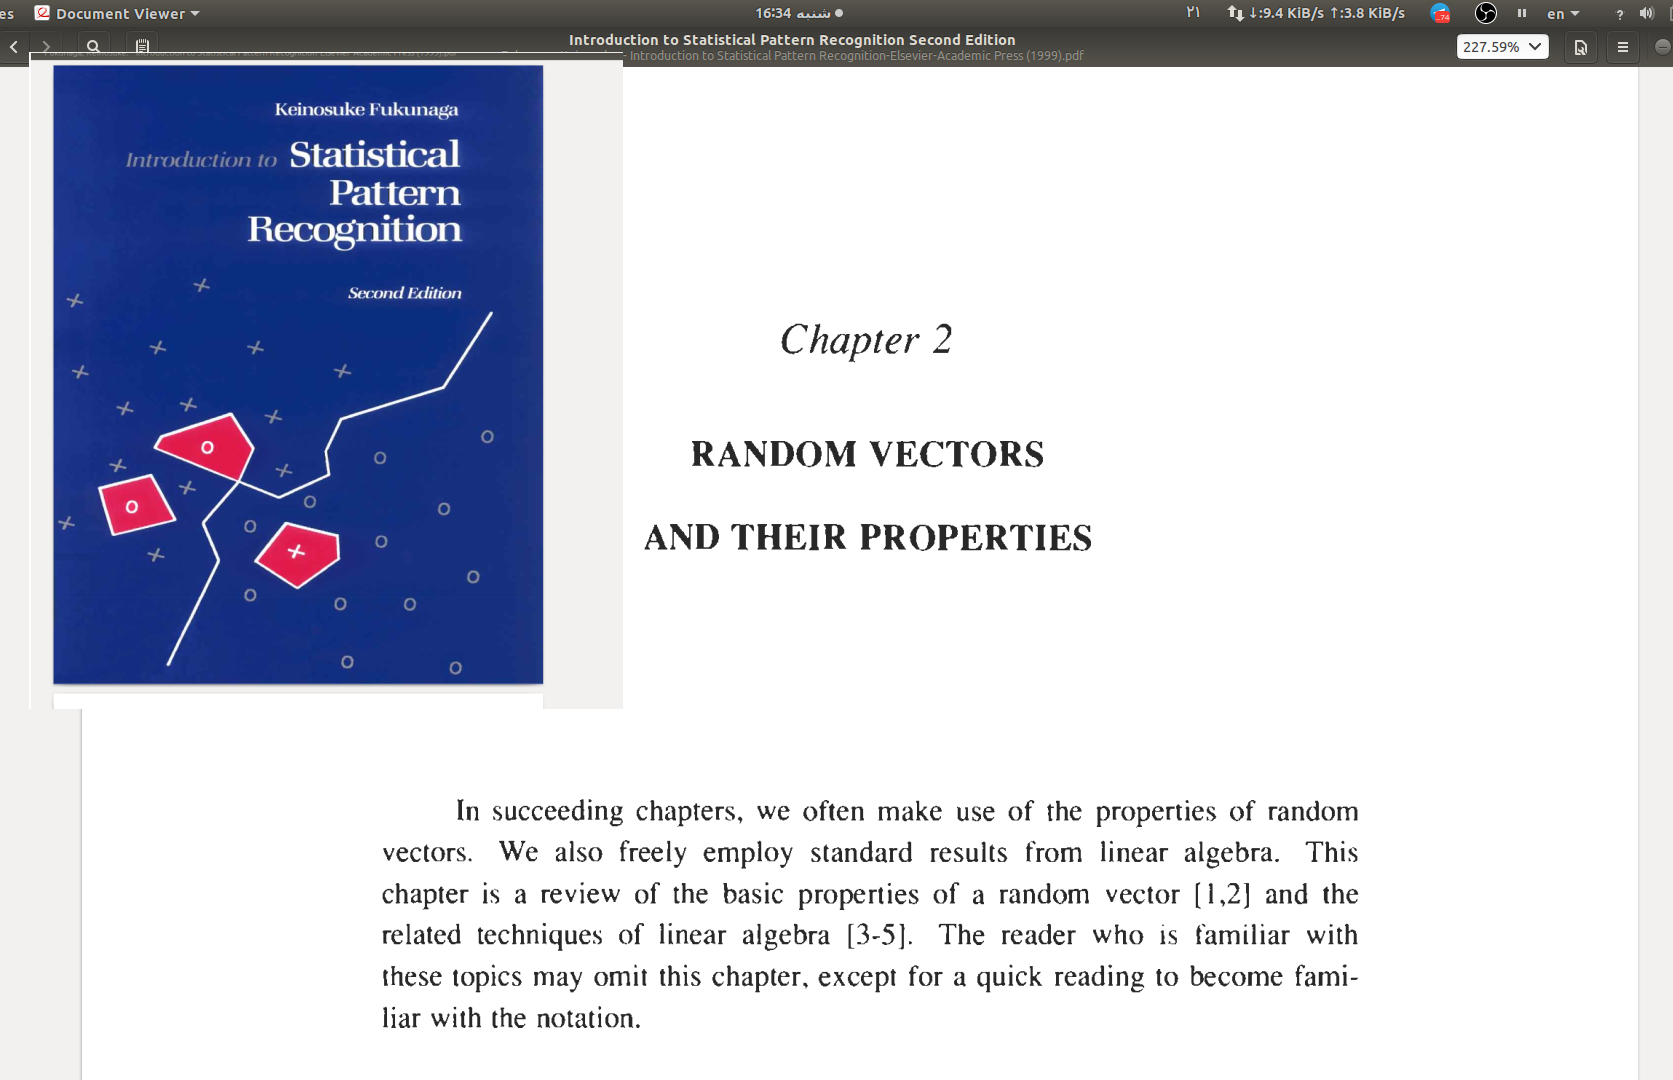

#This page repo on github:

https://github.com/So-AI-love/academic-courses-Pattern-Recognition

Made based of [this post](https://medium.com/analytics-vidhya/gaussian-mixture-models-with-tensorflow-probability-125315891c22)




In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import scipy
import tensorflow as tf
import tensorflow_probability as tfp
tfd = tfp.distributions

In [18]:
!pip install drawnow

In [19]:
# import matplotlib.pyplot as plt
# from drawnow import drawnow
# import numpy as np

# def makeFig():
#     plt.scatter(xList,yList) # I think you meant this

# plt.ion() # enable interactivity
# fig=plt.figure() # make a figure

# xList=list()
# yList=list()

# for i in np.arange(50):
#     y=np.random.random()
#     xList.append(i)
#     yList.append(y)
#     drawnow(makeFig)
#     #makeFig()      The drawnow(makeFig) command can be replaced
#     #plt.draw()     with makeFig(); plt.draw()
#     plt.pause(0.001)

**Statistics**

The statistics required are: mean, covariance, diagonal, and standard deviation. We first generate X, a 2D array, then use the Numpy methods to compare statistics against the parameters used.


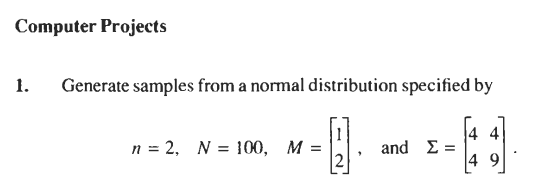

In [20]:
np.random.seed(0)  # random seed dont change  :https://stackoverflow.com/questions/3543833/how-do-i-clear-all-variables-in-the-middle-of-a-python-script
mu = [1,2]
cov = [[4,4],
       [4,9]]
X = np.random.multivariate_normal(mu, cov, size=100)
X_mean = np.mean(X, axis=0)
X_cov = np.cov(X, rowvar=0)
X_diag = np.diag(X_cov)
X_stddev = np.sqrt(X_diag)


2. Plot the generated samples.
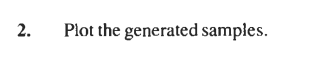

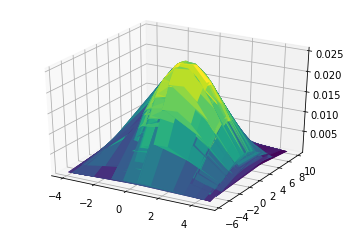

In [21]:
# Due to deprecated MultivariateNormalFullCovariance
mvn = tfd.MultivariateNormalDiag(
 loc=X_mean,
 scale_diag=X_stddev)
mvn_mean = mvn.mean().numpy()
mvn_cov = mvn.covariance().numpy()
mvn_stddev = mvn.stddev().numpy()

x1, x2 = np.meshgrid(X[:,0], X[:,1])
data = np.stack((x1.flatten(), x2.flatten()), axis=1)
prob = mvn.prob(data).numpy()
ax = plt.axes(projection='3d')
ax.plot_surface(x1, x2, prob.reshape(x1.shape), cmap='viridis')
plt.show()

3. Compute[ the sample mean, M, and sample covariance matrix](hhttps://en.wikipedia.org/wiki/Sample_mean_and_covariance).

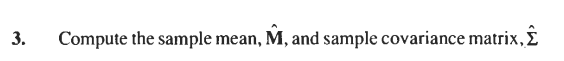

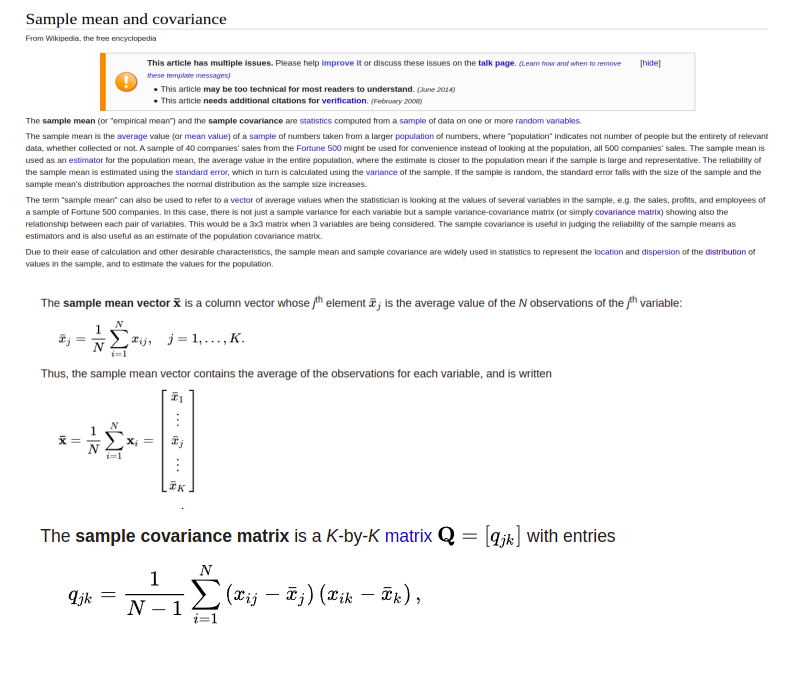

In [22]:
np.random.seed(0)  # random seed
mu = [1,2]
cov = [[4,4],
       [4,9]]
X = np.random.multivariate_normal(mu, cov, size=100)
X_mean = np.mean(X, axis=0)
X_cov = np.cov(X, rowvar=0)
print ('\n\n Sample mean of X which has been made by random.multivariate_normal function is : \n'+str(mvn_mean))
print ('\n\n Sample Covariance of X is : \n'+str(mvn_cov))



 Sample mean of X which has been made by random.multivariate_normal function is : 
[0.834803  2.0952272]


 Sample Covariance of X is : 
[[4.10708256 0.        ]
 [0.         9.58469047]]


**4.Repeat 1 and 3, 10 times. Compute the sample mean and sample variance
for each component of M and C over 10 trials.**

![enter image description here](https://i.stack.imgur.com/8zcbu.png)


 Repeat 10  times 



 Sample mean of X which has been made by random.multivariate_normal function is : 

[0.834803  2.0952272]


 Sample Covariance of X is : 

[[4.10708256 0.        ]
 [0.         9.58469047]]


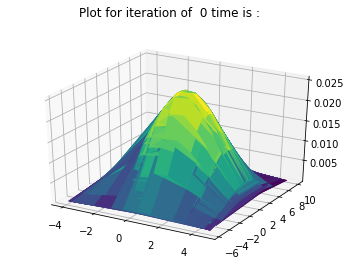



 Sample mean of X which has been made by random.multivariate_normal function is : 

[0.6475149  1.32745588]


 Sample Covariance of X is : 

[[2.75231992 0.        ]
 [0.         7.2122054 ]]


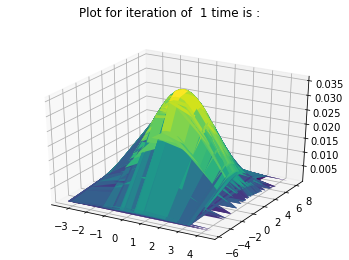



 Sample mean of X which has been made by random.multivariate_normal function is : 

[0.98761936 2.14327504]


 Sample Covariance of X is : 

[[ 4.55332693  0.        ]
 [ 0.         11.85004588]]


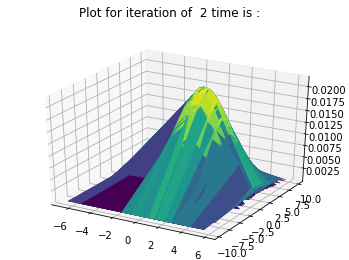



 Sample mean of X which has been made by random.multivariate_normal function is : 

[1.2246131  2.37349258]


 Sample Covariance of X is : 

[[4.14515125 0.        ]
 [0.         7.87737107]]


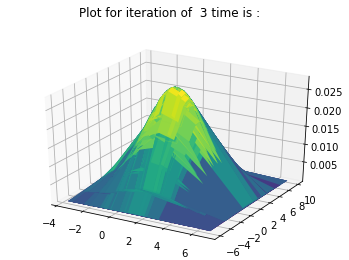



 Sample mean of X which has been made by random.multivariate_normal function is : 

[0.87646804 1.59059846]


 Sample Covariance of X is : 

[[3.76281888 0.        ]
 [0.         8.87094107]]


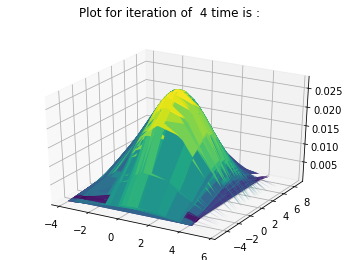



 Sample mean of X which has been made by random.multivariate_normal function is : 

[0.86718221 2.12303167]


 Sample Covariance of X is : 

[[4.55563067 0.        ]
 [0.         9.53026643]]


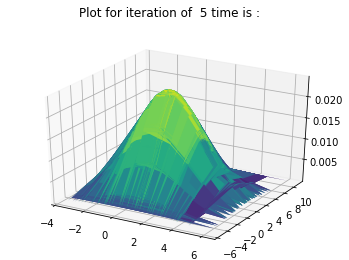



 Sample mean of X which has been made by random.multivariate_normal function is : 

[0.97989241 1.90786438]


 Sample Covariance of X is : 

[[3.76992253 0.        ]
 [0.         9.16283097]]


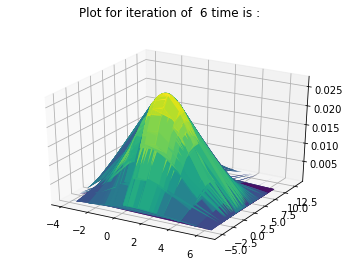



 Sample mean of X which has been made by random.multivariate_normal function is : 

[1.07863261 2.06828839]


 Sample Covariance of X is : 

[[3.84877518 0.        ]
 [0.         8.65353662]]


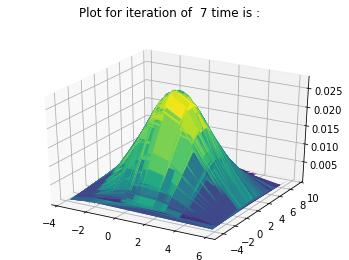



 Sample mean of X which has been made by random.multivariate_normal function is : 

[0.99695523 2.23287119]


 Sample Covariance of X is : 

[[ 5.25275737  0.        ]
 [ 0.         10.57442998]]


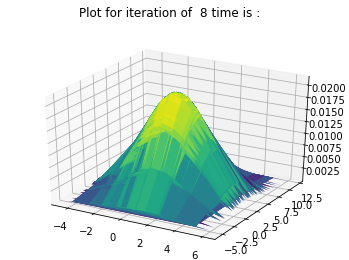



 Sample mean of X which has been made by random.multivariate_normal function is : 

[0.96996853 2.28568479]


 Sample Covariance of X is : 

[[4.36605399 0.        ]
 [0.         8.99865906]]


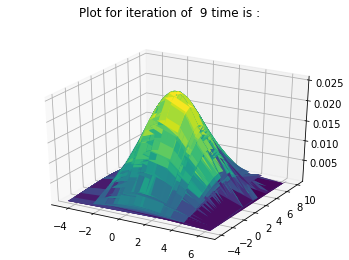

In [23]:
def do_it_loop(loop_1):
  np.random.seed(loop_1)  # random seed dont change  :https://stackoverflow.com/questions/3543833/how-do-i-clear-all-variables-in-the-middle-of-a-python-script
  mu = [1,2]
  cov = [[4,4],
         [4,9]]
  X = np.random.multivariate_normal(mu, cov, size=100)
  X_mean = np.mean(X, axis=0)
  X_cov = np.cov(X, rowvar=0)
  X_diag = np.diag(X_cov)
  X_stddev = np.sqrt(X_diag)


  # Due to deprecated MultivariateNormalFullCovariance
  mvn = tfd.MultivariateNormalDiag(
  loc=X_mean,
  scale_diag=X_stddev)
  mvn_mean = mvn.mean().numpy()
  mvn_cov = mvn.covariance().numpy()
  mvn_stddev = mvn.stddev().numpy()

  print ('\n\n Sample mean of X which has been made by random.multivariate_normal function is : \n\n'+str(mvn_mean))
  print ('\n\n Sample Covariance of X is : \n\n'+str(mvn_cov))

  x1, x2 = np.meshgrid(X[:,0], X[:,1])
  data = np.stack((x1.flatten(), x2.flatten()), axis=1)
  prob = mvn.prob(data).numpy()
  ax = plt.axes(projection='3d')
  ax.plot_surface(x1, x2, prob.reshape(x1.shape), cmap='viridis')

  plt.show()

loop=10;
print(' Repeat '+str(loop)+'  times \n')
for i  in range(0,loop):
    # plt.subplots(1, loop_1)
  fig, axs = plt.subplots(loop,1)
  fig.suptitle('Plot for iteration of  '+str(i)+ ' time is :')

  do_it_loop(i)



**5. Repeat 4 for N =lo, 20, and 40, and examine the effect of the sample size.**

![enter image description here](https://i.stack.imgur.com/cZs2J.png)



 Repeat 10  times 



 Sample mean of X which has been made by random.multivariate_normal function is : 

[0.68980128 1.89551614]


 Sample Covariance of X is : 

[[2.69830159 0.        ]
 [0.         9.73715073]]
0,0


 Sample mean of X which has been made by random.multivariate_normal function is : 

[0.38058067 1.55048399]


 Sample Covariance of X is : 

[[6.65418287 0.        ]
 [0.         6.73380114]]
0,1


 Sample mean of X which has been made by random.multivariate_normal function is : 

[0.62244593 1.55787735]


 Sample Covariance of X is : 

[[3.78288626 0.        ]
 [0.         7.66539077]]
1,0


 Sample mean of X which has been made by random.multivariate_normal function is : 

[1.0482553  2.21677974]


 Sample Covariance of X is : 

[[2.91091543 0.        ]
 [0.         6.97918509]]
1,1


 Sample mean of X which has been made by random.multivariate_normal function is : 

[1.04927251 1.07890031]


 Sample Covariance of X is : 

[[6.75295512 0.        ]
 [0.         8.26389

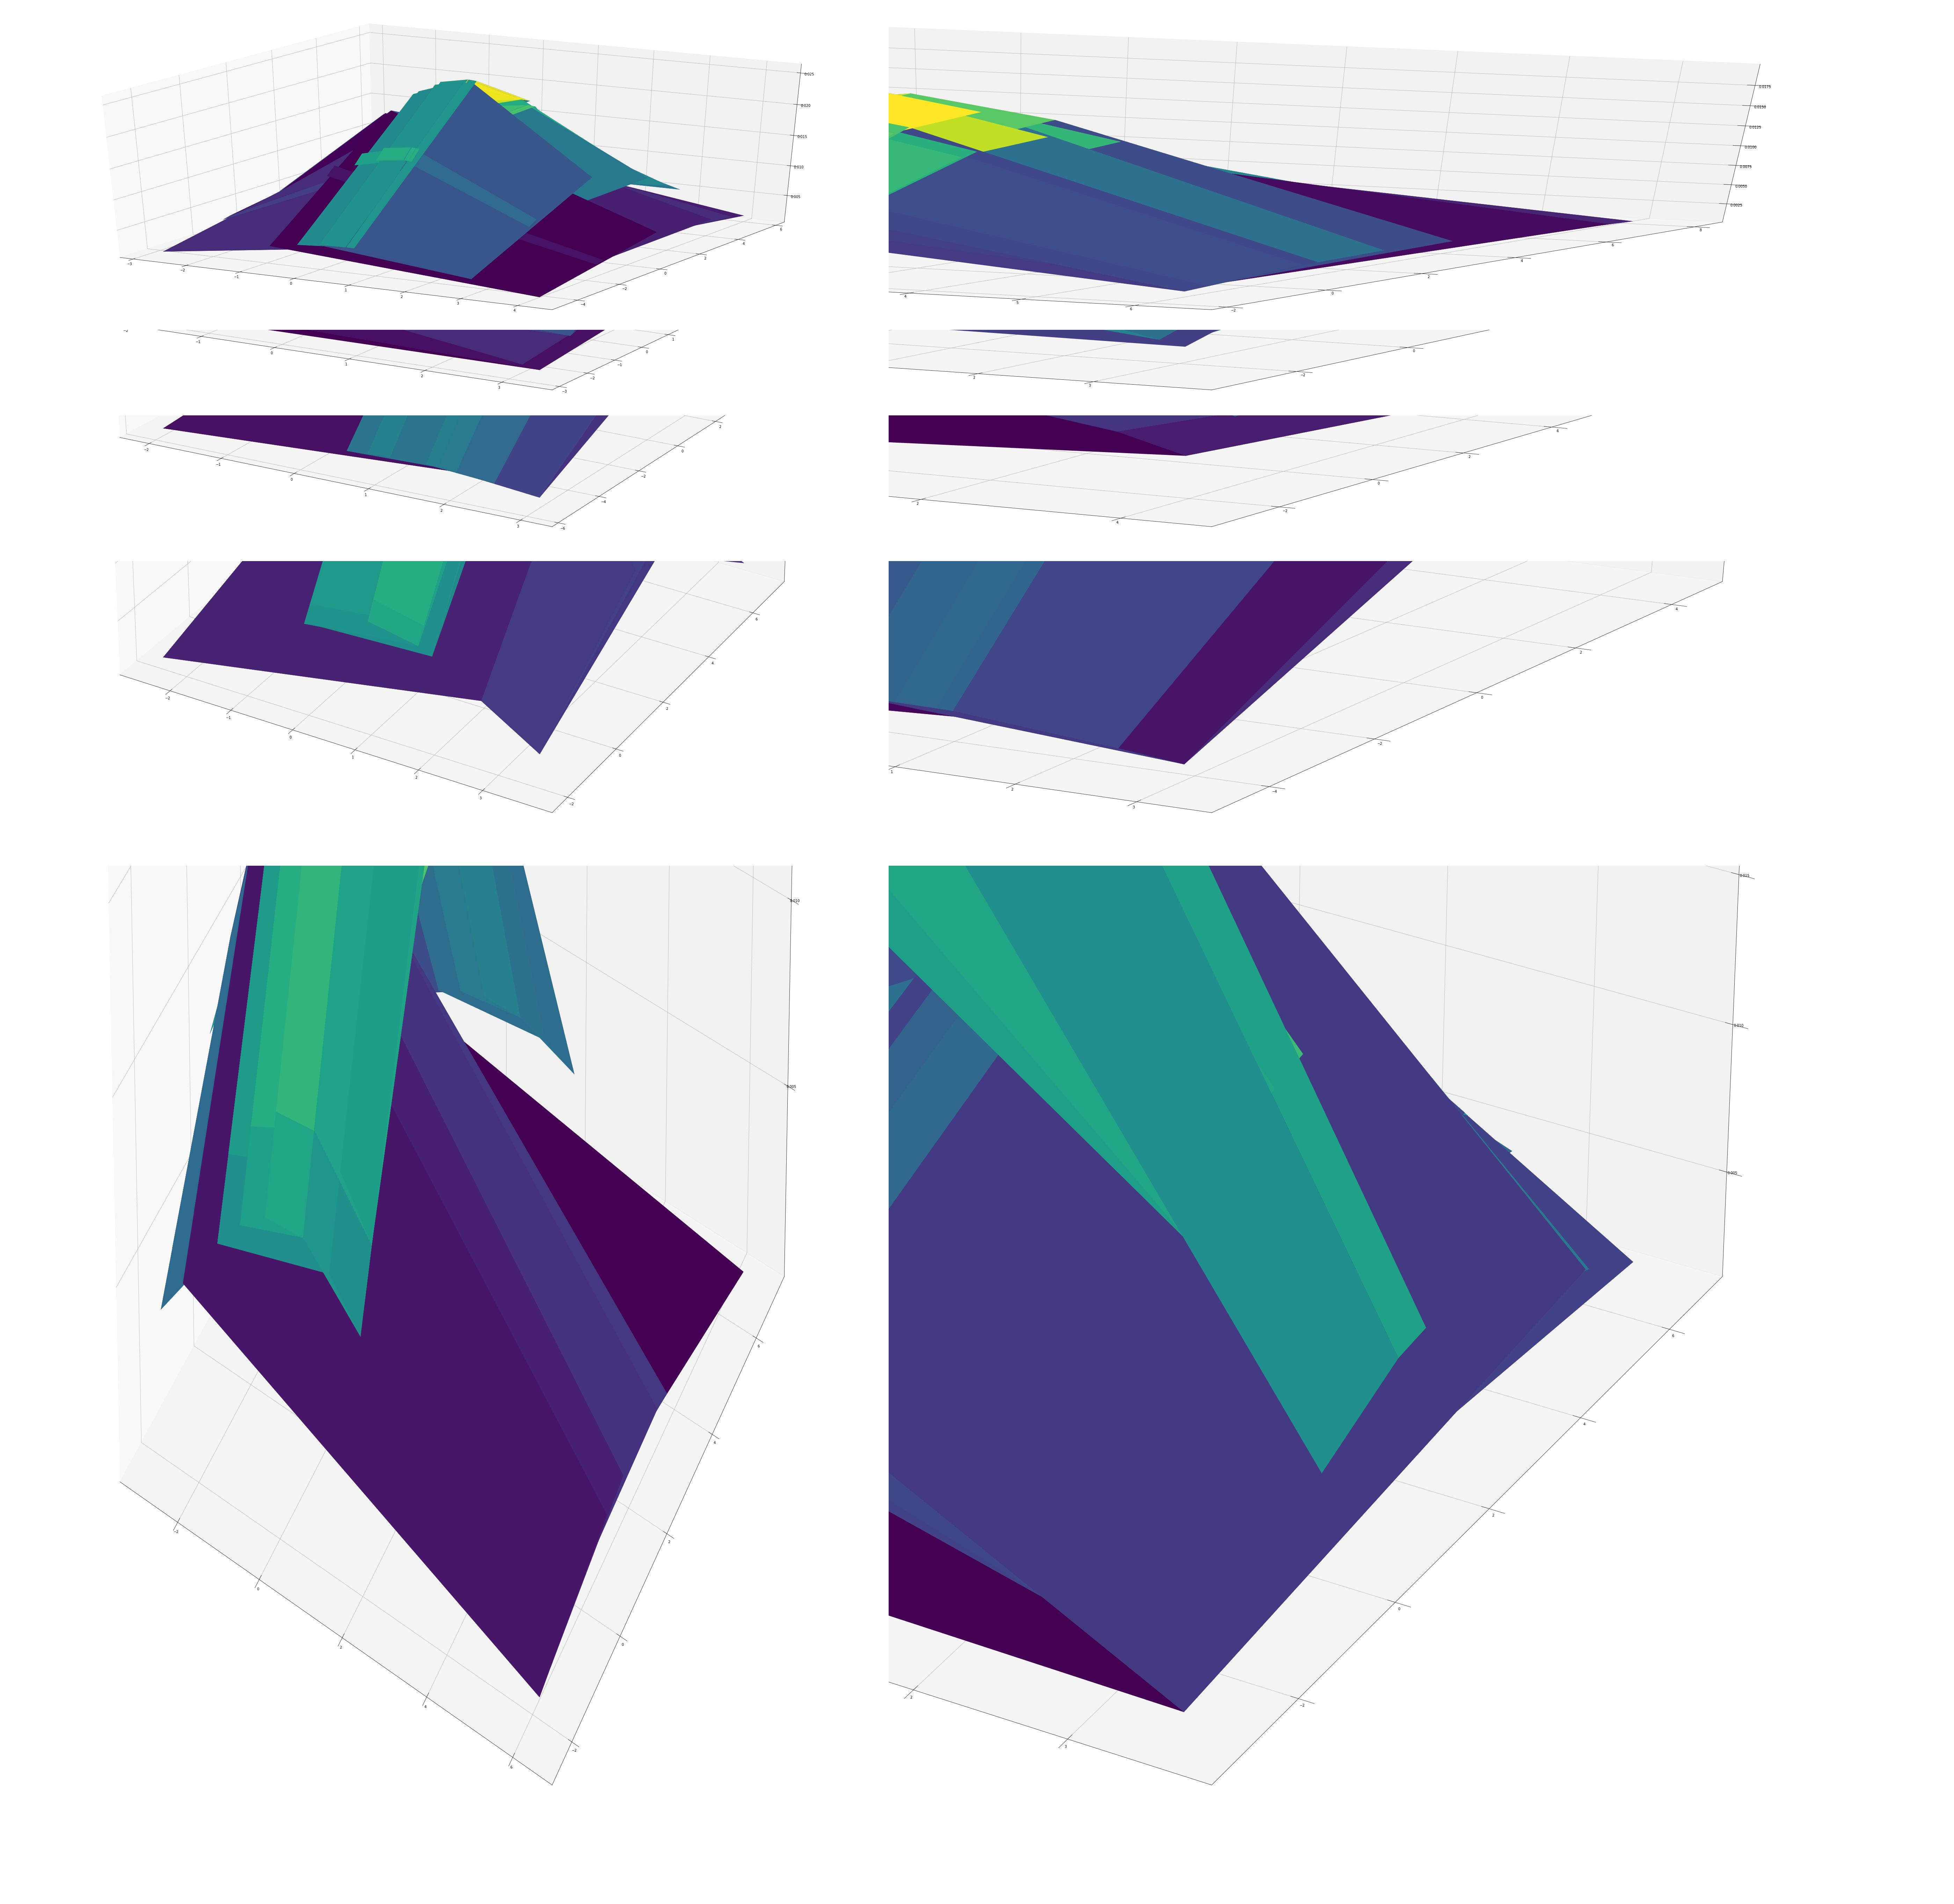

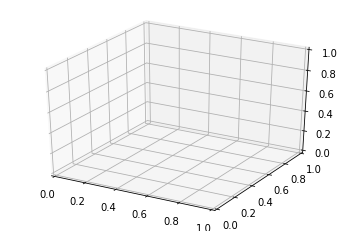

In [38]:
# matplotlib.rcParams.update({'font.serif': 'Times New Roman',
#                                 'font.size': 10.0,
#                                 'axes.labelsize': 'Medium',
#                                 'axes.labelweight': 'normal',
#                                 'axes.linewidth': 0.8,
#                                  ###########################################
#                                  # THIS IS THE IMPORTANT ONE FOR STRETCHING
#                                  # default is [6,4] but...i changed it to
#                                 'figure.figsize':[150,500]   # THIS ONE #
#                               })
    
def do_it_loop_2(loop_1,loop_N,axes,axes_col,axes_raw,fig):#,plt_my):
  mu = [1,2]
  cov = [[4,4],
         [4,9]]
  X = np.random.multivariate_normal(mu, cov, size=loop_N)
  X_mean = np.mean(X, axis=0)
  X_cov = np.cov(X, rowvar=0)
  X_diag = np.diag(X_cov)
  X_stddev = np.sqrt(X_diag)


  # Due to deprecated MultivariateNormalFullCovariance
  mvn = tfd.MultivariateNormalDiag(
  loc=X_mean,
  scale_diag=X_stddev)
  mvn_mean = mvn.mean().numpy()
  mvn_cov = mvn.covariance().numpy()
  mvn_stddev = mvn.stddev().numpy()

  # print ('\n\n Sample mean of X which has been made by random.multivariate_normal function is : \n\n'+str(mvn_mean))
  # print ('\n\n Sample Covariance of X is : \n\n'+str(mvn_cov))

  x1, x2 = np.meshgrid(X[:,0], X[:,1])
  data = np.stack((x1.flatten(), x2.flatten()), axis=1)
  prob = mvn.prob(data).numpy()
  ax = fig.add_subplot(axes_raw+1,axes_col+1,1, projection='3d')
  ax.plot_surface(x1, x2, prob.reshape(x1.shape), cmap='viridis')
  print (str(axes_raw)+','+str(axes_col))
  # axes[axes_raw,axes_col]=ax
  # plt.show()
  return axes

loop=10;
loop_N=[10]#[10,20,40]
np.random.seed(loop)  # random seed dont change  :https://stackoverflow.com/questions/3543833/how-do-i-clear-all-variables-in-the-middle-of-a-python-script
fig = plt.figure(figsize=(100, 100))
axs = plt.subplots(5,2)#, sharex=True, sharey=True)
axs = plt.axes(projection='3d')

print(' Repeat '+str(loop)+'  times \n')
mm=1
for j in loop_N:
  for i  in range(0,5):
    for k in range(0,2):
      
      # plt.subplot(5, 2, mm);
      # if mm<=9 :
        # mm=mm+1;
      # fig.suptitle('Plot for iteration of  '+str(i)+ ' time is :')


      # plt.subplots(5, 2)
      # fig, axs = fig.subplot(i,1)
      # fig.suptitle('Plot for iteration of  '+str(i)+ ' time is :')
      axs_new=do_it_loop_2(i,j,axs,k,i,fig)
      
      # plt.show()
      # fig = plt.figure()
    
# plt.tight_layout()
plt.savefig("plot.png")
plt.show() 

# # fig, ax_array = plt.subplots(nrows=2, ncols=2)
# axs_new = axs_new.flatten()
# plt.subplots(5, 2)
# mm=1
# # (2) Plot loop
# for i, ax in enumerate(axs_new):
#   # ax.plot(x , np.sin(x + np.pi/2*i))
#   plt.subplot(5, 2, mm);
#   if mm<=9 :
#         mm=mm+1;
#   ax.set_title(f'plot {i}')

# plt.suptitle('Plots')
# axes[0].legend()
# axes[-1].set_xlabel('Sample Value', fontsize=13)
# plt.savefig('finalplot')
# plt.show()


    #  axes = fig.subplots(nrows=3, ncols=4)
    #  axs=do_it_loop_2(i,j)
    #  plt.show()



# # (1) Prepare the figure infrastructure 
# fig, ax_array = plt.subplots(nrows=2, ncols=2)
# ax_array = ax_array.flatten()

# # (2) Plot loop
# for i, ax in enumerate(ax_array):
#   ax.plot(x , np.sin(x + np.pi/2*i))
#   #ax.set_title(f'plot {i}')


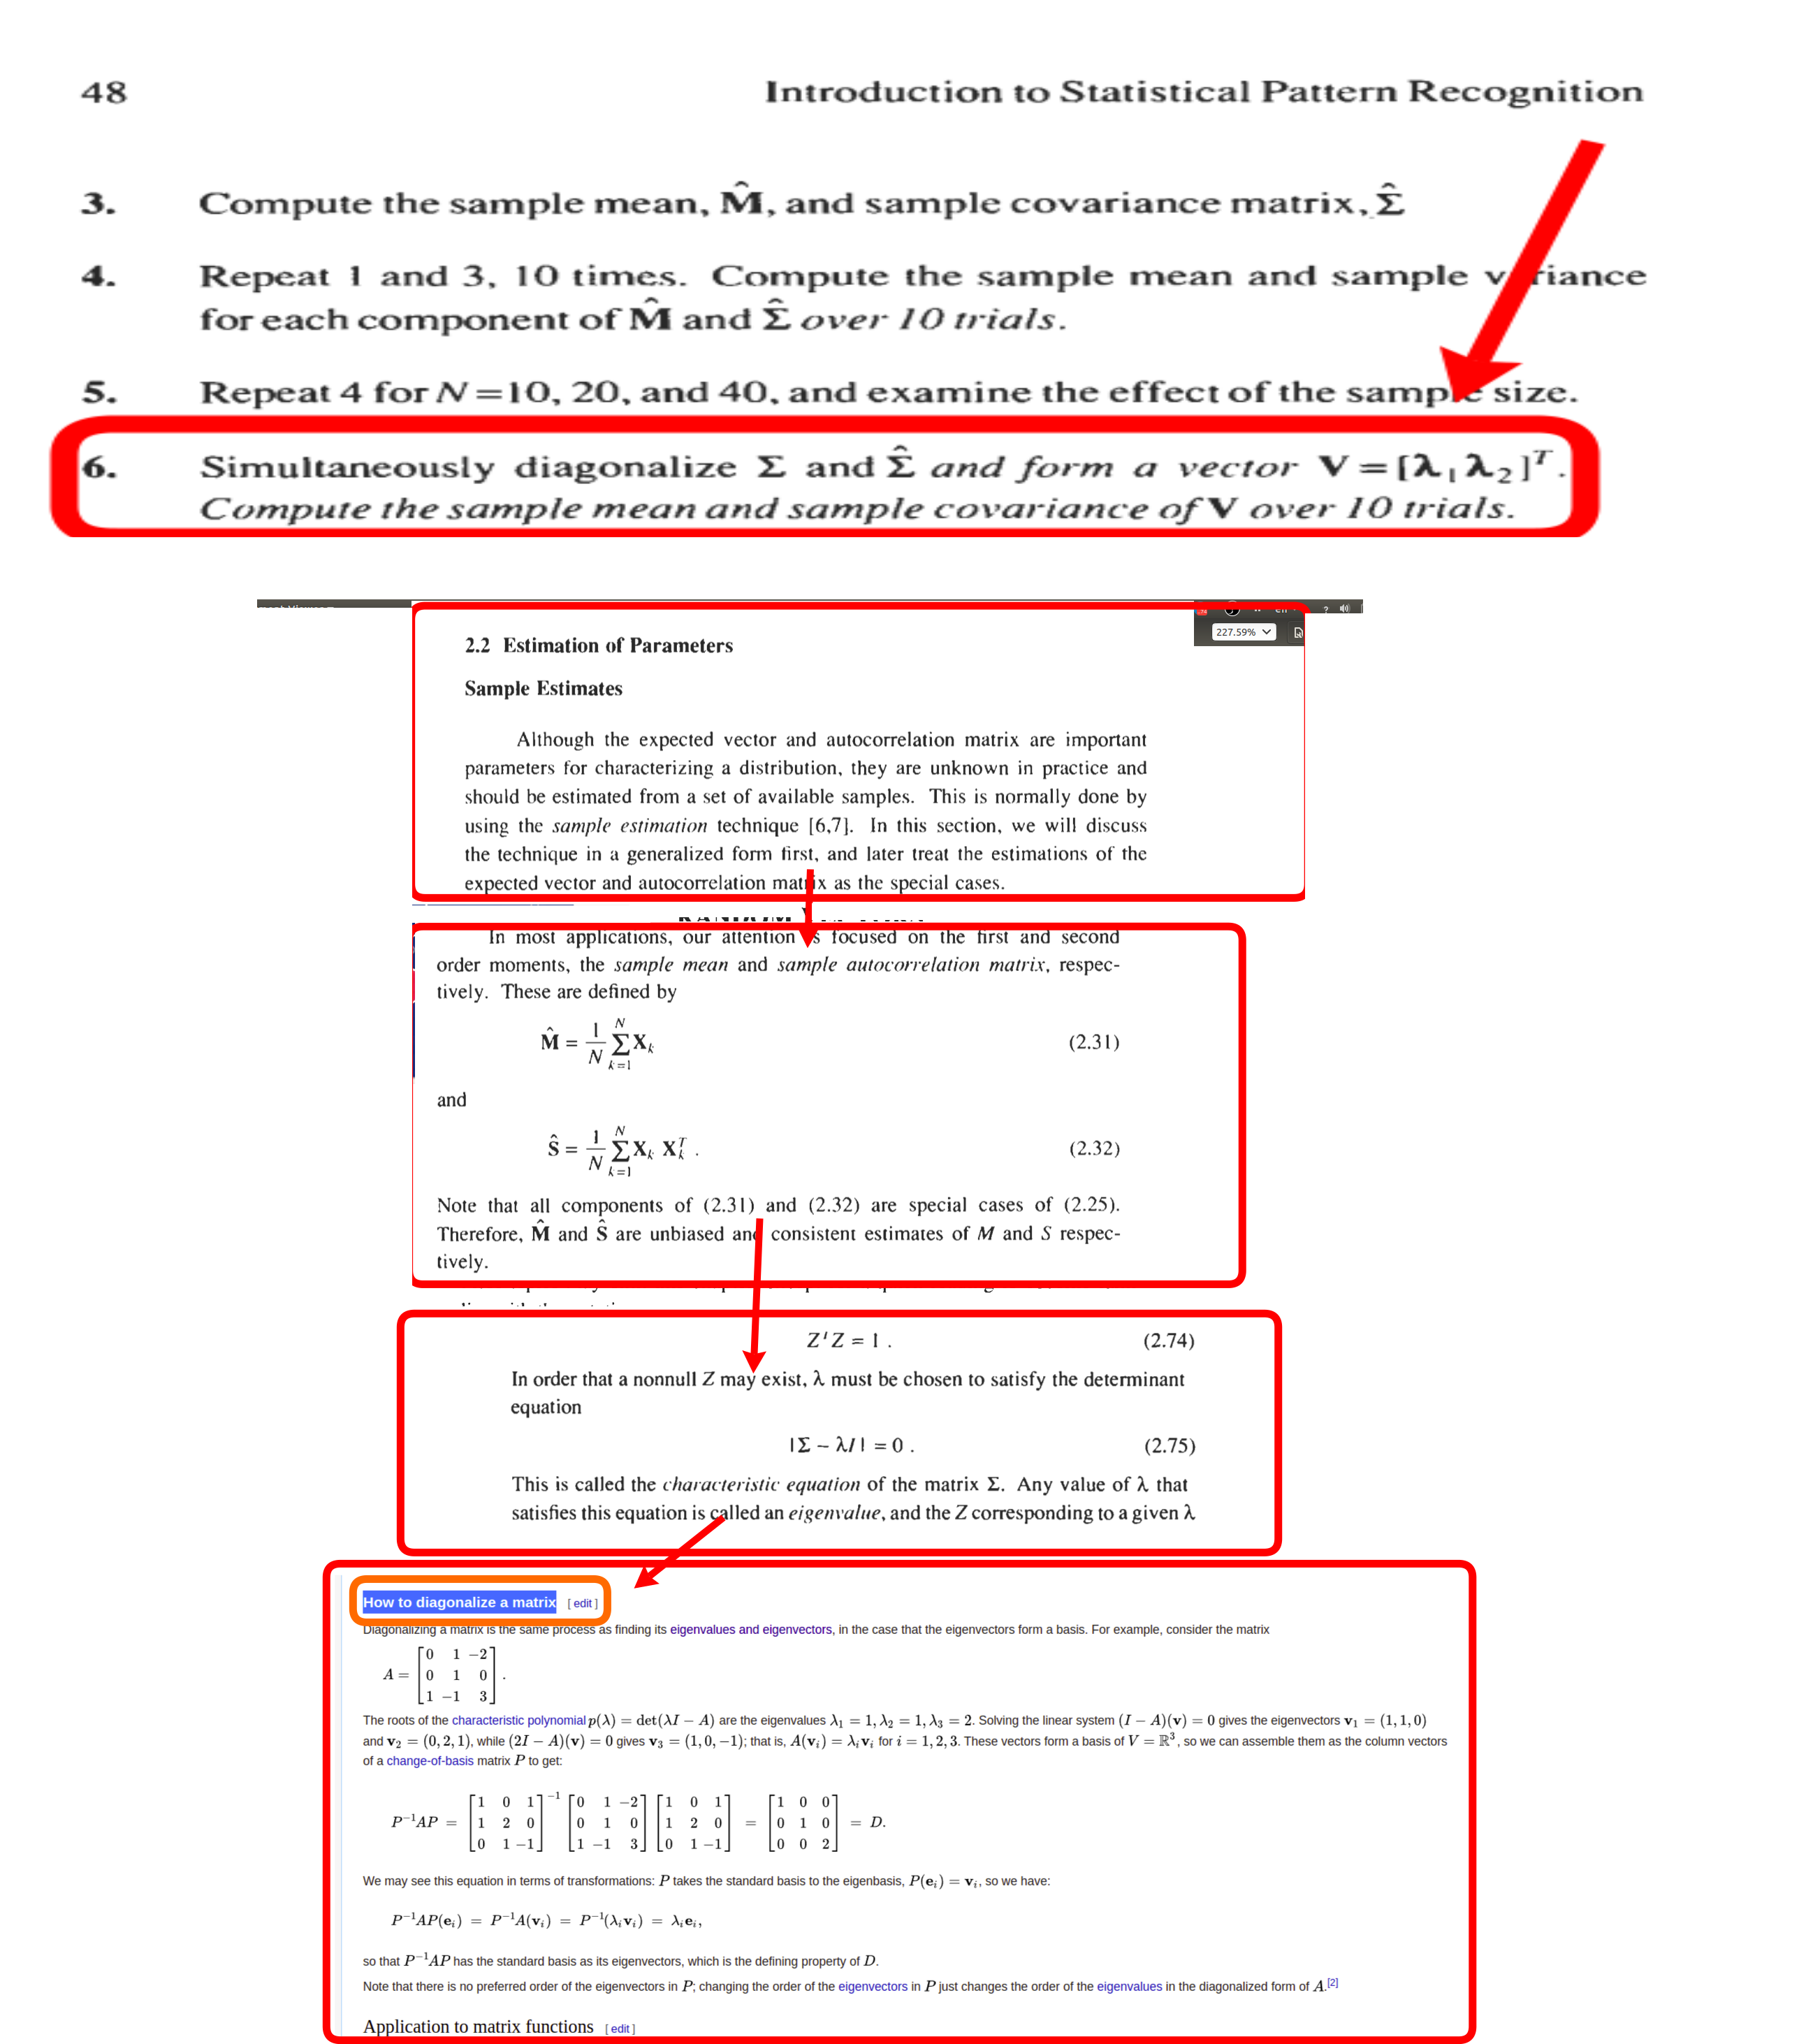

**Simultaneously diagonalize X and and form a vector V = [XI &I7
Compute the sample mean and sample covariance of V over I O trials**


![enter image description here](https://i.stack.imgur.com/PJOI4.png)



In [40]:
cov = [[4,4],
         [4,9]]
mvn_cov_Diag=np.diag(np.diag(mvn_cov))
w,v =  np.linalg.eig(mvn_cov)
print( 'The Covariance Diagonal shape is: \n\n'+str(mvn_cov_Diag))

# print("Diagonal of Lambda: \n{}\n".format(diag_lambda))

# Find the eigendecomposition of matrix A
# decomp_A = tf.tensordot(tf.tensordot(eigen_vectors_A, diag_lambda, axes=1), tf.linalg.inv(new_eigen_vectors_A), axes=1)

# print("\n The decomposition Matrix A: \n{}".format(decomp_A))
print("\n The decomposition Matrix v: \n{}".format(v))
print("\n The decomposition Matrix W: \n{}".format(w))

The Covariance Diagonal shape is: 

[[4.10708256 0.        ]
 [0.         9.58469047]]

 The decomposition Matrix v: 
[[1. 0.]
 [0. 1.]]

 The decomposition Matrix W: 
[4.10708256 9.58469047]


 Repeat 10  times 



 Sample mean of X which has been made by random.multivariate_normal function is : 

[1.28555734 1.99712695]


 Sample Covariance of X is : 

[[4.1692159  0.        ]
 [0.         9.49452674]]


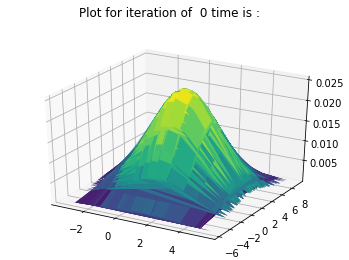



 Sample mean of X which has been made by random.multivariate_normal function is : 

[1.25844582 2.69552468]


 Sample Covariance of X is : 

[[3.74605826 0.        ]
 [0.         7.07835359]]


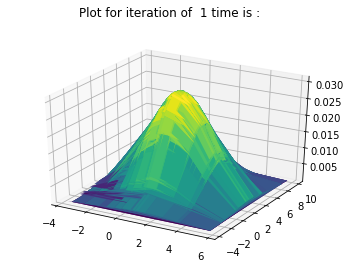



 Sample mean of X which has been made by random.multivariate_normal function is : 

[1.37481519 2.60074514]


 Sample Covariance of X is : 

[[3.96210157 0.        ]
 [0.         9.16112336]]


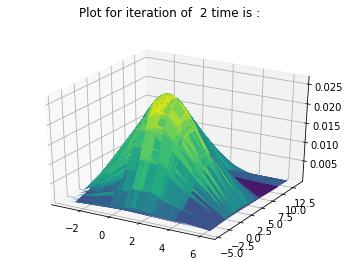



 Sample mean of X which has been made by random.multivariate_normal function is : 

[1.35186055 2.20712073]


 Sample Covariance of X is : 

[[3.99627727 0.        ]
 [0.         8.35023848]]


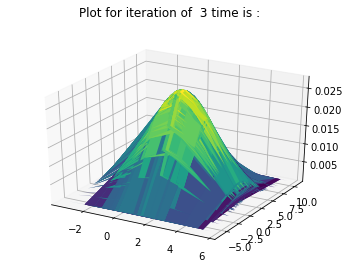



 Sample mean of X which has been made by random.multivariate_normal function is : 

[1.2164947  2.56774134]


 Sample Covariance of X is : 

[[3.2911997  0.        ]
 [0.         8.31178336]]


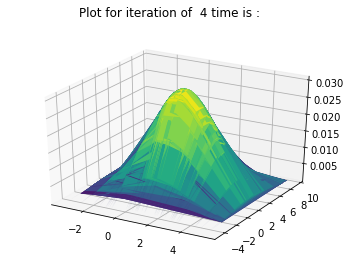



 Sample mean of X which has been made by random.multivariate_normal function is : 

[1.45535489 2.53053455]


 Sample Covariance of X is : 

[[2.69098889 0.        ]
 [0.         9.35737922]]


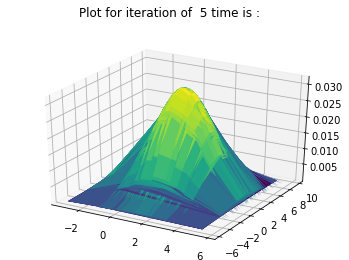



 Sample mean of X which has been made by random.multivariate_normal function is : 

[1.42208987 2.61304075]


 Sample Covariance of X is : 

[[2.34634249 0.        ]
 [0.         9.49178049]]


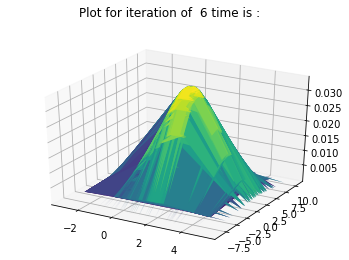



 Sample mean of X which has been made by random.multivariate_normal function is : 

[1.3811696  2.52303274]


 Sample Covariance of X is : 

[[2.41902119 0.        ]
 [0.         9.02390354]]


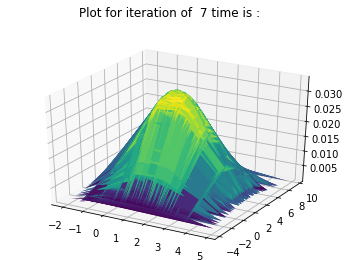



 Sample mean of X which has been made by random.multivariate_normal function is : 

[1.51576164 2.34167057]


 Sample Covariance of X is : 

[[ 3.08033158  0.        ]
 [ 0.         10.90619746]]


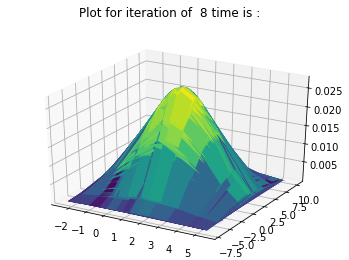



 Sample mean of X which has been made by random.multivariate_normal function is : 

[1.73231648 2.10963969]


 Sample Covariance of X is : 

[[ 3.12434968  0.        ]
 [ 0.         11.23603193]]


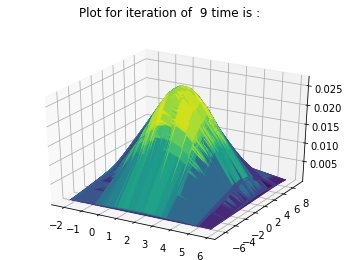

In [29]:
def do_it_loop(loop_1,con_new,mu):
  np.random.seed(loop_1)  # random seed dont change  :https://stackoverflow.com/questions/3543833/how-do-i-clear-all-variables-in-the-middle-of-a-python-script
  # mu = [1,2]
  # cov = [[4,4],
  #        [4,9]]
  cov=np.diag(np.diag(con_new))

  X = np.random.multivariate_normal(mu, cov, size=100)
  X_mean = np.mean(X, axis=0)
  X_cov = np.cov(X, rowvar=0)
  X_diag = np.diag(X_cov)
  X_stddev = np.sqrt(X_diag)


  # Due to deprecated MultivariateNormalFullCovariance
  mvn = tfd.MultivariateNormalDiag(
  loc=X_mean,
  scale_diag=X_stddev)
  mvn_mean = mvn.mean().numpy()
  mvn_cov = mvn.covariance().numpy()
  mvn_stddev = mvn.stddev().numpy()

  print ('\n\n Sample mean of X which has been made by random.multivariate_normal function is : \n\n'+str(mvn_mean))
  print ('\n\n Sample Covariance of X is : \n\n'+str(mvn_cov))

  x1, x2 = np.meshgrid(X[:,0], X[:,1])
  data = np.stack((x1.flatten(), x2.flatten()), axis=1)
  prob = mvn.prob(data).numpy()
  ax = plt.axes(projection='3d')
  ax.plot_surface(x1, x2, prob.reshape(x1.shape), cmap='viridis')

  plt.show()
  return mvn_cov,mvn_mean

cov_m= [[4,4],
        [4,9]];
mu = [1,2];
loop=10;
print(' Repeat '+str(loop)+'  times \n')
for i  in range(0,loop):
    # plt.subplots(1, loop_1)
  fig, axs = plt.subplots(loop,1)
  fig.suptitle('Plot for iteration of  '+str(i)+ ' time is :')

  cov_new,mvn_mean=do_it_loop(i,cov_m,mu)
  cov_m=cov_new;mu=mvn_mean

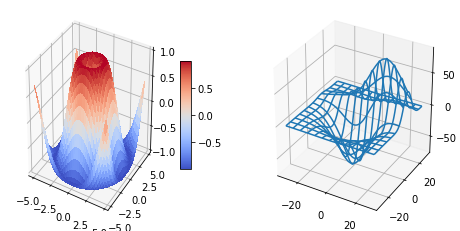

In [27]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
import matplotlib.pyplot as plt


# imports specific to the plots in this example
import numpy as np
from matplotlib import cm
from mpl_toolkits.mplot3d.axes3d import get_test_data

# Twice as wide as it is tall.
fig = plt.figure(figsize=plt.figaspect(0.5))

#---- First subplot
ax = fig.add_subplot(1, 2, 1, projection='3d')
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_zlim3d(-1.01, 1.01)

fig.colorbar(surf, shrink=0.5, aspect=10)

#---- Second subplot
ax = fig.add_subplot(1, 2, 2, projection='3d')
X, Y, Z = get_test_data(0.05)
ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10)

plt.show()

#The question asked:


1-[Can not fit the 3D subplot photo sizes (matplotlib)](https://stackoverflow.com/questions/67034366/can-not-fit-the-3d-subplot-photo-sizes-matplotlib):
![enter image description here](https://i.stack.imgur.com/6DtxW.png)
